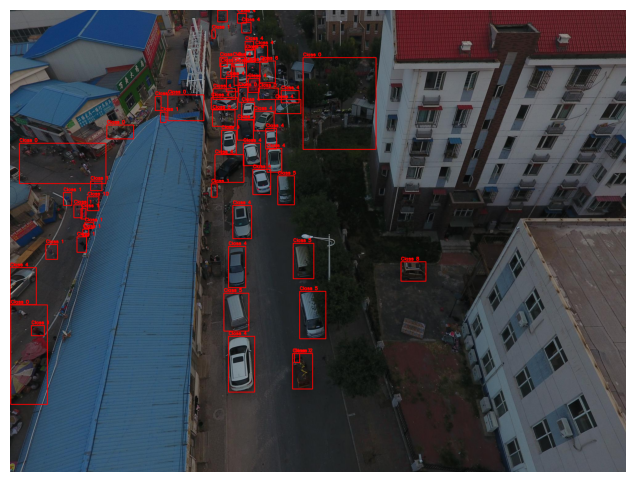

In [1]:
import cv2
import matplotlib.pyplot as plt

# Path to the image and annotation file
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\images\9999999_00855_d_0000391.jpg"  
annotation_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\annotations\9999999_00855_d_0000391.txt"  

# Read the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display in Matplotlib

# Read the annotation file
with open(annotation_path, "r") as file:
    lines = file.readlines()

# Draw bounding boxes
for line in lines:
    values = list(map(int, line.strip().split(",")))  # Convert annotation to list of integers
    x, y, w, h, _, category, truncation, occlusion = values  # Extract values
    
    # Define bounding box color based on category
    color = (255, 0, 0)  # Default color (Red)
    
    # Draw the bounding box
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    
    # Put the category label
    cv2.putText(image, f"Class {category}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the image with bounding boxes
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()


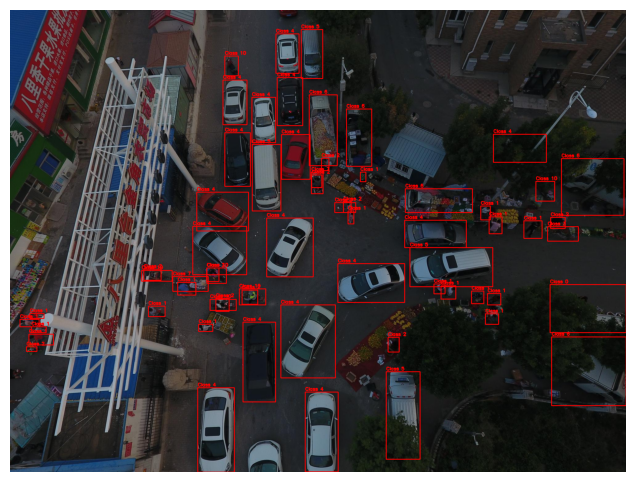

In [3]:
import cv2
import matplotlib.pyplot as plt

# Path to the image and annotation file
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\images\9999999_00865_d_0000396.jpg"  # Change this to your actual image path
annotation_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\annotations\9999999_00865_d_0000396.txt"  # Change this to your actual annotation file

# Read the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display in Matplotlib

# Read the annotation file
with open(annotation_path, "r") as file:
    lines = file.readlines()

# Draw bounding boxes
for line in lines:
    values = list(map(int, line.strip().split(",")))  # Convert annotation to list of integers
    x, y, w, h, _, category, truncation, occlusion = values  # Extract values
    
    # Define bounding box color based on category
    color = (255, 0, 0)  # Default color (Red)
    
    # Draw the bounding box
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    
    # Put the category label
    cv2.putText(image, f"Class {category}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the image with bounding boxes
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()


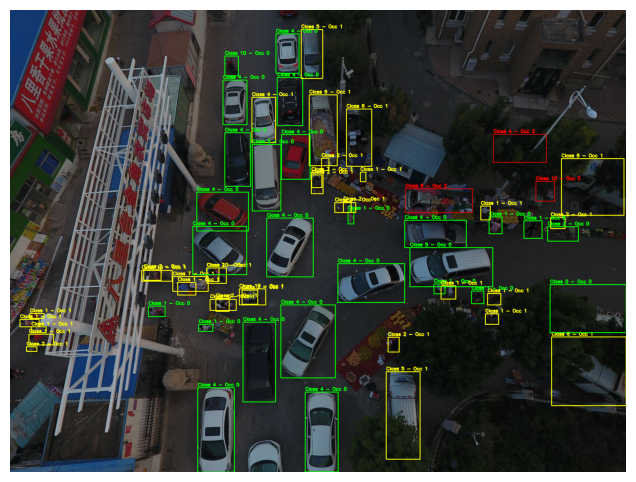

In [5]:
import cv2
import matplotlib.pyplot as plt

# Path to the image and annotation file
image_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\images\9999999_00865_d_0000396.jpg"  # Change this to your actual image path
annotation_path = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\annotations\9999999_00865_d_0000396.txt"  # Change this to your actual annotation file

# Read the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# Read the annotation file
with open(annotation_path, "r") as file:
    lines = file.readlines()

# Define colors based on occlusion level
occlusion_colors = {
    0: (0, 255, 0),   # Green (No occlusion)
    1: (255, 255, 0), # Yellow (Partial occlusion)
    2: (255, 0, 0)    # Red (Largely occluded)
}

# Draw bounding boxes
for line in lines:
    values = list(map(int, line.strip().split(",")))  # Convert annotation to list of integers
    x, y, w, h, _, category, truncation, occlusion = values  # Extract values
    
    color = occlusion_colors.get(occlusion, (255, 255, 255))  # Default to white if unknown

    # Draw bounding box
    if occlusion == 2:
        # Draw a dotted box for heavily occluded objects
        thickness = 2
        gap = 5
        for i in range(x, x + w, gap):
            cv2.line(image, (i, y), (i + thickness, y), color, thickness)
            cv2.line(image, (i, y + h), (i + thickness, y + h), color, thickness)
        for j in range(y, y + h, gap):
            cv2.line(image, (x, j), (x, j + thickness), color, thickness)
            cv2.line(image, (x + w, j), (x + w, j + thickness), color, thickness)
    else:
        # Draw a solid bounding box for normal/partially occluded objects
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)

    # Add label
    cv2.putText(image, f"Class {category} - Occ {occlusion}", (x, y - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the image with bounding boxes
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()


In [7]:
import os
import glob
import cv2

# Define directories
image_dir = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\images"
ann_dir = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\annotations"
output_dir = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\yolo_labels"
os.makedirs(output_dir, exist_ok=True)

# Process each annotation file
for ann_file in glob.glob(os.path.join(ann_dir, "*.txt")):
    # Assume the annotation file and image file share the same base name.
    base_name = os.path.splitext(os.path.basename(ann_file))[0]
    
    # Try common image extensions (adjust as needed)
    image_path = os.path.join(image_dir, base_name + ".jpg")
    if not os.path.exists(image_path):
        image_path = os.path.join(image_dir, base_name + ".png")
    if not os.path.exists(image_path):
        print(f"Warning: Image for {ann_file} not found. Skipping.")
        continue

    # Read the image and get its dimensions
    img = cv2.imread(image_path)
    if img is None:
        print(f"Warning: Could not load image {image_path}. Skipping.")
        continue
    height, width = img.shape[:2]

    # Read the corresponding annotation file
    with open(ann_file, "r") as f:
        lines = f.readlines()

    yolo_annotations = []
    for line in lines:
        parts = [p.strip() for p in line.strip().split(',') if p.strip()]
        if len(parts) != 8:
            print(f"Skipping malformed line in {ann_file}: {line.strip()}")
            continue
        try:
            x1, y1, w, h, score, category, truncation, occlusion = map(float, parts)
        except ValueError:
            print(f"Skipping non-numeric line in {ann_file}: {line.strip()}")
            continue

        # Convert to YOLO format using the actual image dimensions
        x_center = (x1 + w / 2) / width
        y_center = (y1 + h / 2) / height
        w_norm = w / width
        h_norm = h / height

        # Write annotation: <class_id> <x_center> <y_center> <width> <height> <occlusion>
        yolo_annotations.append(f"{int(category)} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f} {int(occlusion)}")

    # Save the converted YOLO annotations to the output directory
    output_file = os.path.join(output_dir, os.path.basename(ann_file))
    with open(output_file, "w") as f:
        f.write("\n".join(yolo_annotations))

print("✅ Conversion complete! YOLO annotations with correct normalization saved in:", output_dir)


✅ Conversion complete! YOLO annotations with correct normalization saved in: C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\yolo_labels


In [9]:
import os
import glob
import cv2

def convert_annotations_for_dataset(image_dir, ann_dir, output_dir):
    """
    Converts VisDrone annotations to YOLO format for a given dataset.
    
    Parameters:
      image_dir (str): Directory containing the images.
      ann_dir (str): Directory containing the original annotations.
      output_dir (str): Directory to save the converted YOLO-format annotations.
      
    For each annotation file, the script:
        - Finds the corresponding image (tries .jpg then .png)
        - Reads the image dimensions from the image file.
        - Converts each annotation from:
              x1, y1, w, h, score, category, truncation, occlusion
          to YOLO format:
              <class_id> <x_center> <y_center> <width> <height> <occlusion>
          with all values normalized by the image's actual width and height.
    """
    os.makedirs(output_dir, exist_ok=True)
    
    # Process every annotation file (*.txt) in the annotation directory.
    for ann_file in glob.glob(os.path.join(ann_dir, "*.txt")):
        base_name = os.path.splitext(os.path.basename(ann_file))[0]
        
        # Look for the corresponding image. Adjust the extensions if needed.
        image_path = os.path.join(image_dir, base_name + ".jpg")
        if not os.path.exists(image_path):
            image_path = os.path.join(image_dir, base_name + ".png")
        if not os.path.exists(image_path):
            print(f"Warning: Image for {ann_file} not found. Skipping.")
            continue

        # Read the image to get its dimensions.
        img = cv2.imread(image_path)
        if img is None:
            print(f"Warning: Could not load image {image_path}. Skipping.")
            continue
        height, width = img.shape[:2]

        # Read the annotation file.
        with open(ann_file, "r") as f:
            lines = f.readlines()

        yolo_annotations = []
        for line in lines:
            # Split by comma, strip extra spaces, and filter out empty strings.
            parts = [p.strip() for p in line.strip().split(',') if p.strip()]
            if len(parts) != 8:
                print(f"Skipping malformed line in {ann_file}: {line.strip()}")
                continue

            try:
                x1, y1, w, h, score, category, truncation, occlusion = map(float, parts)
            except ValueError:
                print(f"Skipping non-numeric line in {ann_file}: {line.strip()}")
                continue

            # Calculate YOLO bounding box parameters using the actual image dimensions.
            x_center = (x1 + w / 2) / width
            y_center = (y1 + h / 2) / height
            w_norm = w / width
            h_norm = h / height

            # Write annotation as: <class_id> <x_center> <y_center> <width> <height> <occlusion>
            yolo_annotations.append(f"{int(category)} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f} {int(occlusion)}")

        # Save the converted annotations into the output folder.
        output_file = os.path.join(output_dir, os.path.basename(ann_file))
        with open(output_file, "w") as f:
            f.write("\n".join(yolo_annotations))

    print(f"✅ Conversion complete for dataset with images in '{image_dir}'.")
    print(f"YOLO annotations saved in '{output_dir}'.\n")


# Define your dataset directories:

# Train set
train_image_dir = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\images"
train_ann_dir   = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\VisDrone2019-DET-train\annotations"
train_output_dir = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-train\yolo_labels"

# Validation set
val_image_dir = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-val\VisDrone2019-DET-val\images"
val_ann_dir   = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-val\VisDrone2019-DET-val\annotations"
val_output_dir = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-val\yolo_labels"

# Test set (Test-dev)
test_image_dir = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images"
test_ann_dir   = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\annotations"
test_output_dir = r"C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\yolo_labels"

# Convert each dataset
convert_annotations_for_dataset(train_image_dir, train_ann_dir, train_output_dir)
convert_annotations_for_dataset(val_image_dir, val_ann_dir, val_output_dir)
convert_annotations_for_dataset(test_image_dir, test_ann_dir, test_output_dir)

✅ Conversion complete for dataset with images in 'C:\Users\jmdgo\Downloads\VisDrone2019-DET-val\VisDrone2019-DET-val\images'.
YOLO annotations saved in 'C:\Users\jmdgo\Downloads\VisDrone2019-DET-val\yolo_labels'.

✅ Conversion complete for dataset with images in 'C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\images'.
YOLO annotations saved in 'C:\Users\jmdgo\Downloads\VisDrone2019-DET-test-dev\yolo_labels'.



In [2]:
import yaml

# Define paths
data_config = {
    'train': 'C:/Users/jmdgo/Downloads/VisDrone2019-DET-train/VisDrone2019-DET-train/images',
    'val': 'C:/Users/jmdgo/Downloads/VisDrone2019-DET-val/VisDrone2019-DET-val/images',
    'test': 'C:/Users/jmdgo/Downloads/VisDrone2019-DET-test-dev/images',
    'nc': 10,  # Number of classes
    'names': [
        'pedestrian', 'people', 'bicycle', 'car', 'van', 
        'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor'
    ],
    'train_labels': 'C:/Users/jmdgo/Downloads/VisDrone2019-DET-train/annotations',
    'val_labels': 'C:/Users/jmdgo/Downloads/VisDrone2019-DET-val/annotations',
    'test_labels': 'C:/Users/jmdgo/Downloads/VisDrone2019-DET-test-dev/annotations'
}

# Save to a YAML file
yaml_path = "data.yaml"
with open(yaml_path, "w") as file:
    yaml.dump(data_config, file, default_flow_style=False)

print(f"data.yaml file has been created at: {yaml_path}")

data.yaml file has been created at: data.yaml


In [23]:
pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/914.6 kB ? eta -:--:--
   ---------------- ---------------------- 389.1/914.6 kB 11.8 MB/s eta 0:00:01
   --------------------------------- ------ 768.0/914.6 kB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 914.6/914.6 kB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from ultralytics import YOLO

# Load the YOLOv8x model
model = YOLO("yolov8x.pt")

# Train the model
model.train(
    data="data.yaml",  # Path to your dataset YAML file
    epochs=100,
    imgsz=640,
    batch=16
)